## FEC Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
cm = pd.read_csv('data/04aii_pas_cleaned.csv')

cm.head()

,cmte_id,cmte_name,entity_tp,name,other_id,other_name,transaction_amt,cand_id,cand_name,transaction_dt,...,rpt_tp,image_num,transaction_tp,city,state,zip_code,employer,file_num,memo_cd,cmte_tres
0,C00390633,comm3__SCHOOLSFIRST FEDERAL CREDIT UNION EMPLO...,enttp_Candidate Committee,comm2__PETE AGUILAR FOR CONGRESS (nonaffiliated),C00510461,PETE AGUILAR FOR CONGRESS,2500,H2CA31125,"AGUILAR, PETE",2017-12-18,...,Year end,201801249090614097,Contribution made to nonaffiliated committee,SAN BERNARDINO,CA,92423,NaN,1199694,NaN,CARY DAVIDSON
1,C00392464,comm3__UNIVERSAL MUSIC GROUP PAC,enttp_Candidate Committee,comm2__RATCLIFFE FOR CONGRESS (nonaffiliated),C00554113,RATCLIFFE FOR CONGRESS,500,H4TX04153,"RATCLIFFE, JOHN L",2017-12-12,...,Year end,201801249090614162,Contribution made to nonaffiliated committee,ROCKWALL,TX,75032,NaN,1199696,NaN,CARY DAVIDSON
2,C00392464,comm3__UNIVERSAL MUSIC GROUP PAC,enttp_Candidate Committee,comm2__TED DEUTCH FOR CONGRESS COMMITTEE (nona...,C00469163,TED DEUTCH FOR CONGRESS COMMITTEE,2000,H0FL19080,"DEUTCH, THEODORE ELIOT",2017-12-13,...,Year end,201801249090614162,Contribution made to nonaffiliated committee,WASHINGTON,DC,20036,NaN,1199696,NaN,CARY DAVIDSON
3,C00368993,comm3__WINNING STRATEGIES WASHINGTON PAC,enttp_Candidate Committee,comm2__DONALD M PAYNE JR FOR CONGRESS (nonaffi...,C00519355,DONALD M PAYNE JR FOR CONGRESS,1300,H2NJ10154,"PAYNE, DONALD M., JR.",2017-12-12,...,Year end,201801249090614336,Contribution made to nonaffiliated committee,NEWARK,NJ,07114,NaN,1199704,NaN,MICHAEL MEROLA
4,C00368993,comm3__WINNING STRATEGIES WASHINGTON PAC,enttp_Candidate Committee,comm2__FRIENDS OF DON BEYER (nonaffiliated),C00555888,FRIENDS OF DON BEYER,500,H4VA08224,"BEYER, DONALD STERNOFF HONORABLE JR.",2017-10-31,...,Year end,201801249090614337,Contribution made to nonaffiliated committee,ALEXANDRIA,VA,22314,NaN,1199704,NaN,MICHAEL MEROLA


In [3]:
year = '2018'

In [4]:
spent = pd.read_csv('data/04aii_committee_stats.csv')
spent.index = list(spent['cmte_name'].values)

cand = pd.read_csv('data/04aii_cand_cleaned.csv')
cands = list(set(cand['cand_id']))
cols = [x for x in list(spent.columns) if x in cands]
cols.extend(['total', 'count', 'distinct', 'entity_tps'])
spent = spent[['cmte_name'] + cols]
print(len(spent))
spent.head(2)

3156


,cmte_name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,S8VT00141,S8WA00194,S8WA00319,S8WI00224,S8WV00143,S8WY00189,total,count,distinct,entity_tps
comm3__CONGRESSIONAL LEADERSHIP FUND,comm3__CONGRESSIONAL LEADERSHIP FUND,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,124708177,1211,100,['enttp_Organization (not a committee and not ...
comm3__SMP,comm3__SMP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8418619,0,107503012,352,20,['enttp_Organization (not a committee and not ...


In [5]:
for col in spent.columns:
    if spent[col].sum() == 0:
        spent.drop([col], axis = 1, inplace = True)
#         print(col)
        print('.', end = '')

........................

In [6]:
counts = spent.drop([
    'cmte_name', 
    'total', 
    'count', 
    'distinct', 
    'entity_tps',
], axis = 1)

for col in counts.columns:
    counts[col] = [1 if x > 0 else 0 for x in counts[col]]
    
print(len(counts.columns))
counts = counts.sum().sort_values(ascending = False)
counts[:20]

809


H6IL06117    773
S2NV00183    766
S2ND00099    724
H8MN03077    701
S2IN00091    672
H6OR02116    668
S8MI00281    662
S6PA00217    655
H6TX08100    628
H4FL26038    625
S6WY00068    625
S8FL00166    623
H0CA19173    618
H8MA02041    613
H6CA22125    609
S6MT00162    604
H2IL13120    589
S6OH00163    574
H0KS03137    573
H4CA45097    539
dtype: int64

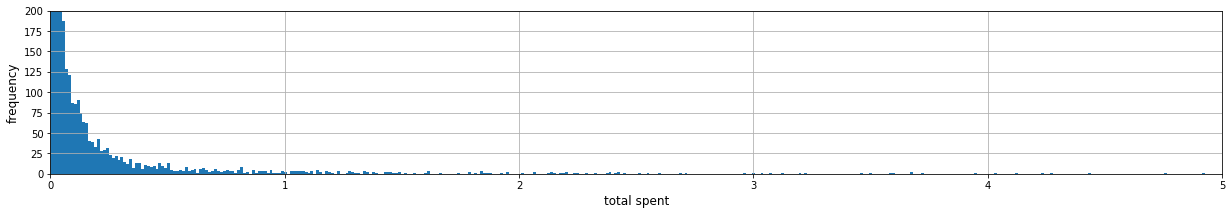

In [8]:
plt.figure(figsize = (21, 3))

(spent['total']/1.0E6).hist(bins = 10000)

plt.xlim([0, 5])
plt.xlabel('total spent', fontsize = 12)
plt.ylim([0, 200])
plt.ylabel('frequency', fontsize = 12)

plt.show();

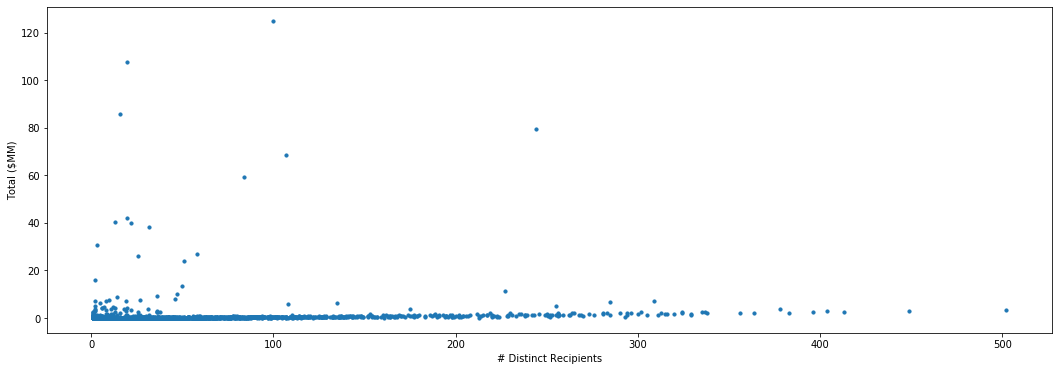

In [9]:
plt.figure(figsize = (18, 6))

plt.scatter(
    spent['distinct'], 
    spent['total']/1.0E6, 
    s = 10,
)
plt.xlabel('# Distinct Recipients')
plt.ylabel('Total ($MM)')
plt.show();

In [10]:
std_tot = spent['total'].std()
med_tot = spent['total'].median()

std_dist = spent['distinct'].std()
med_dist = spent['distinct'].median()

spent_new = spent[
    ~(
        (spent['total'] < 0.*med_tot + 0.*std_tot) & \
        (spent['distinct'] < 0.*med_dist + 0.*std_dist)
    ) 
]

len(spent_new)

3156

In [11]:
spent_new['distinct'].value_counts().sort_index()

1       79
2       73
3       62
4       89
5      111
      ... 
396      1
404      1
413      1
449      1
502      1
Name: distinct, Length: 266, dtype: int64

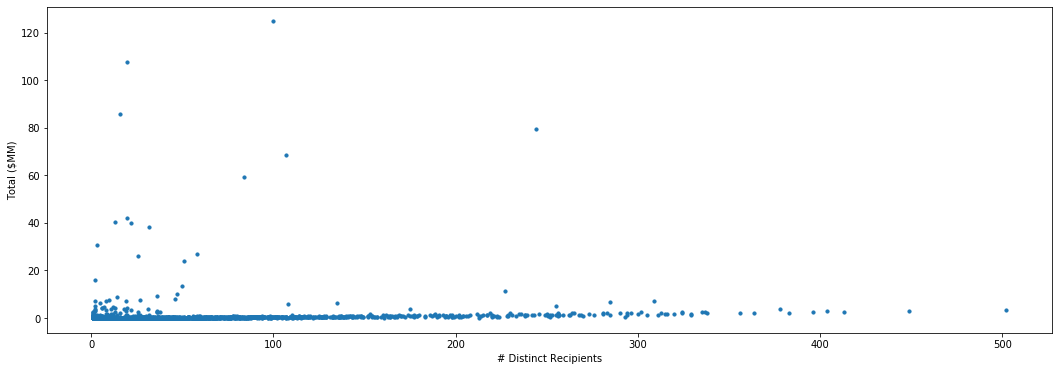

In [12]:
plt.figure(figsize = (18, 6))

plt.scatter(
    spent_new['distinct'], 
    spent_new['total']/1.0E6, 
    s = 10,
)
plt.xlabel('# Distinct Recipients')
plt.ylabel('Total ($MM)')
plt.show();

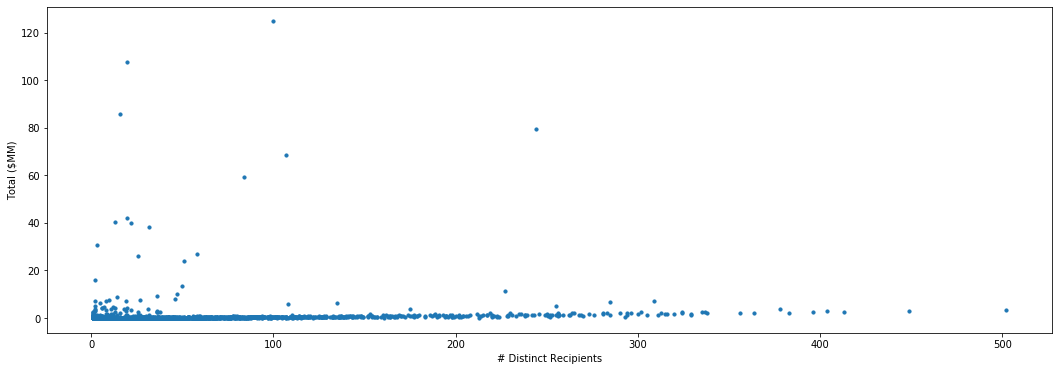

In [13]:
plt.figure(figsize = (18, 6))

plt.scatter(
    spent_new['distinct'], 
    spent_new['total']/1.0E6, 
    s = 10,
)
plt.xlabel('# Distinct Recipients')
plt.ylabel('Total ($MM)')
plt.show();

In [14]:
rows = []
for comm in list(spent_new.index):
    lil_row = []
    lil_cand = cand[cand[comm] > 0]
    for which in ['Republican', 'Democrat', 'Third party']:    
        liller_cand = lil_cand[lil_cand['cand_pty_affiliation'] == which]
        lil_row.append(liller_cand[comm].sum())
        lil_row.append(len(liller_cand.drop_duplicates(['cand_id'], keep = 'first')))
    rows.append(lil_row)
    
rows = pd.DataFrame(
    rows, 
    columns = [
        'r_amt', 
        'r_count', 
        'd_amt', 
        'd_count',
        't_amt',
        't_count',
    ], 
    index = list(spent_new['cmte_name'].values), 
)

rows.sort_index(inplace = True)
rows.head()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm3__(cmte_name missing),2492499.0,251,966413.0,249,4000.0,1
"comm3__1-800 CONTACTS, INC. PAC",22400.0,7,5500.0,6,0.0,0
comm3__150PAC.ORG,5000.0,4,12500.0,11,0.0,0
comm3__21ST CENTURY MAJORITY FUND,115000.0,16,0.0,0,0.0,0
comm3__314 ACTION FUND,522238.0,3,620681.0,24,0.0,0


In [15]:
rows[(rows['r_amt'] != 0) & (rows['d_amt'] != 0)].sort_index()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm3__(cmte_name missing),2492499.0,251,966413.0,249,4000.0,1
"comm3__1-800 CONTACTS, INC. PAC",22400.0,7,5500.0,6,0.0,0
comm3__150PAC.ORG,5000.0,4,12500.0,11,0.0,0
comm3__314 ACTION FUND,522238.0,3,620681.0,24,0.0,0
comm3__340B HEALTH PAC (340B HEALTH PAC),16500.0,9,17500.0,12,0.0,0
...,...,...,...,...,...,...
"comm3__ZIMMER BIOMET HOLDINGS, INC. PAC (A.K.A. 'ZIMMER BIOMET PAC')",33500.0,15,19000.0,6,0.0,0
comm3__ZIONS BANCORP PAC,24500.0,7,5000.0,1,0.0,0
comm3__ZOETIS GOOD GOVERNMENT FUND,26000.0,7,1500.0,1,0.0,0
comm3__ZUFFA POLITICAL ACTION COMMMITTEE,20400.0,6,11000.0,3,0.0,0


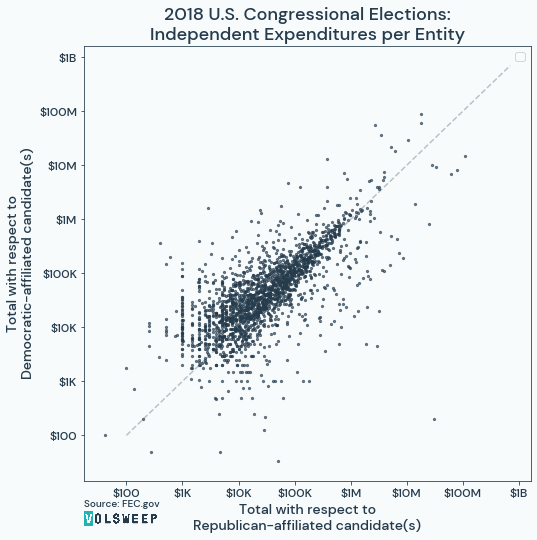

In [29]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (8, 8))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'  

plt.scatter(
    np.log10(rows['d_amt']),
    np.log10(rows['r_amt']),
    alpha = 0.65,
    color = vol_dark,
    s = 5,
)

max_amt = max(rows['d_amt'].max(), rows['r_amt'].max())

plt.title(f'{year} U.S. Congressional Elections:\nIndependent Expenditures per Entity', fontsize = 18)
plt.xlabel('Total with respect to\nRepublican-affiliated candidate(s)', fontsize = 14)
locs = range(2, int(np.log10(max_amt)) + 10)
vals = ['${:,}'.format(10**x) for x in locs]
vals = [x.replace(',000,000,000', '')+'B' if (',000,000,000' in x) else x for x in vals]
vals = [x.replace(',000,000', '')+'M' if (',000,000' in x) else x for x in vals]
vals = [x.replace(',000', '')+'K' if (',000' in x) else x for x in vals]
plt.xticks(locs, vals, fontsize = 12)
plt.ylabel('Total with respect to\nDemocratic-affiliated candidate(s)', fontsize = 14)
plt.yticks(locs,vals, fontsize = 12)

plt.plot(
    [2, 1.1*np.log10(max_amt)], 
    [2, 1.1*np.log10(max_amt)], 
    ls = '--', 
    alpha = 0.3, 
    color = vol_dark,
)

legend_elements = []

legend = plt.legend(
    loc='upper right', 
    fontsize=12, 
    facecolor='#f8fbfc', 
    handles=legend_elements,
)
    
x = ax.annotate('Source: FEC.gov', 
                xy=(0.0, 0.0), 
                xytext=(38.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)
plt.show();

In [ ]:
for thislet in these:
    print(thislet)
    plot_foragainst(thislet)

In [ ]:
# HUSTLE advocated Republicans
cand.loc[
    (cand['comm1__HUSTLE (for)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__HUSTLE (for)',
]].sort_values(['comm1__HUSTLE (for)'], ascending = False)

In [ ]:
# GOOGLE both advocated and opposed
cand.loc[
    (cand['comm1__GOOGLE (against)'] > 0) & \
    (cand['comm1__GOOGLE (for)'] > 0), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__GOOGLE (for)',
        'comm1__GOOGLE (against)',
]].sort_values(['comm1__GOOGLE (for)'], ascending = False)

In [ ]:
# SKDKNICKERBOCKER advocated a Republican
cand.loc[
    (cand['comm1__SKDKNICKERBOCKER (for)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__SKDKNICKERBOCKER (for)',
]].sort_values(['comm1__SKDKNICKERBOCKER (for)'], ascending = False)

In [ ]:
# SKDKNICKEBOCKER opposed a Democrat
cand.loc[
    (cand['comm1__SKDKNICKERBOCKER (against)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Democrat'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__SKDKNICKERBOCKER (against)',
]].sort_values(['comm1__SKDKNICKERBOCKER (against)'], ascending = False)

In [ ]:
cand[cand['comm1__SKDKNICKERBOCKER (against)'] > 0]

In [ ]:
# FP1 STRATEGIES opposed a Republican
cand.loc[
    (cand['comm1__FP1 STRATEGIES (against)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__FP1 STRATEGIES (against)',
]].sort_values(['comm1__FP1 STRATEGIES (against)'], ascending = False)

In [ ]:
spent_newest = pd.concat([spent_new, rows], axis = 1)
spent_newest['name'] = [x.replace('comm1__', '') for x in spent_newest['name']]
spent_newest.reset_index(drop = True, inplace = True)
spent_newest['r_amt:total'] = spent_newest['r_amt']/(spent_newest['r_amt'] + spent_newest['d_amt'])
spent_newest['r_count:total'] = spent_newest['r_count']/(spent_newest['r_count'] + spent_newest['d_count'])
print(len(spent_newest))
spent_newest.head()

In [ ]:
spent_newest.to_csv('data/04bi_committee1_stats.csv', index = False)

In [ ]:
# get subset of column names containing 'comm1__'
comms = [x for x in cand.columns if 'comm1__' in x]

# remove the 'comm1__'
comms = [x.replace('comm1__', '') for x in comms]

# keep committee columns that appear in 'name' column
comms = [x for x in comms if x in list(spent_newest['name'])]

# add the 'comm1__' back on
comms = sorted(['comm1__' + x for x in comms])

# get the non-'comm1__' columns
notcomm_cols = [x for x in cand.columns if 'comm1__' not in x]

# non-'comm1__' dataframe subset
cand_notcomm = cand[notcomm_cols]

# concatenate 'comm1__' and non-'comm1__' dataframes
cand = pd.concat([cand_notcomm, cand[comms]], axis = 1)

cand.head(2)

In [ ]:
for which in [0, 1]:
    print('proportion to R:', which, '\n')
    those = spent_newest.loc[spent_newest['r_amt:total'] == which, ['name', 'total']]
    print(those)
    print('\n')

In [ ]:
cand.to_csv('data/04bi_cand_cleaned.csv', index = False)